<div class="alert alert-success">
  Mejorar la performance de nuestros modelos no solo pasa por optimizar sus parametros. 
  <br>Una de las partes clave, y según algunos expertos la más importante, es la de **diseñar la representación en la que se entregan los datos a los modelos** para que estos los procesen. <br>
  Esto equivale, en palabras más simples, en definir de forma inteligente las features (columnas) de nuestras tablas de datos.
            </div>

**Ejemplo de feature engineering:**

*El problema*:
    
Supongamos que estamos tratando de resolver el problema siguiente.

- Tenemos un problema de reconocer si ciertos datos con una sola feature son de una clase 1 o de una clase 2 (por ejemplo "el producto esta deficiente" o "el producto esta funcional").
- Por lo tanto estamos resolviendo una **clasificación**.
- Para esta clasificación decidimos tomar un SVM, que es un modelo poderoso que funciona buscando la "mejor" recta que separa los puntos de cada clase.

<img src="../img/classif_1_feature.png">

*Como podemos ver no existe un separador óptimo. Debemos para resolver el problema buscar un modelo aún más poderoso? No necesariamente.*

**Agregemos una nueva feature: $$X[columna_2] = X[columna_1]^2$$**

<img src="../img/classif_2_features.png">

*Claramente con esta nueva feature vemos que existe una recta que separa los espacios de puntos. <br>
Esta recta tendra un score ampliamente mejor que cualquier solucion al primer problema.*

## Principios de diseño de Features

<div class="alert alert-success">
  Diseñar tus features es un arte más que una ciencia (por lo que en general te recomendamos ganar experiencia leyendo articulos cientificos y viendo soluciones
  <ol>
    <li> <strong>Features Informativas</strong>: Tus features son más utiles mientras más correlación tengan tu variable objetivo.</li>
    <li> <strong>Features Independientes</strong>: Para no tener redudancias tus features deberían ser lo más independientes posible entre ellas.</li>
    <li> <strong>Cantidad de Features controlada</strong>: Nuestra intuición nos falla en dimensiones superiores a 3 (ver video maldicion de la dimensionalidad). </li>
    <li> En la mayoría de los casos aumentar la cantidad de features afecta negativamente la performance si no contamos con una gran cantidad de datos. </li>
    <li> Por ultimo pocas features aseguran una mejor interpretabilidad de los modelos. </li>
  </ol>
</div>

**Ejemplo de Feature informativa y Feature no informativa**

<span style="color:green"> Predecir el **precio de una casa** en **función de sus metros cuadrados**.</span> <br>

<span style="color:red"> Predecir el **precio de una casa** en **función de la temperatura del mar**.</span>


Es importante entender la correlación entre la feature y la variable objetivo. Más sobre esto en los siguientes videos.

**Visualizar interdepencia entre variables**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
df = pd.read_csv('../data/transformed/peliculas_opening.csv').drop(columns=['worldwide_gross', 'movie_title'])

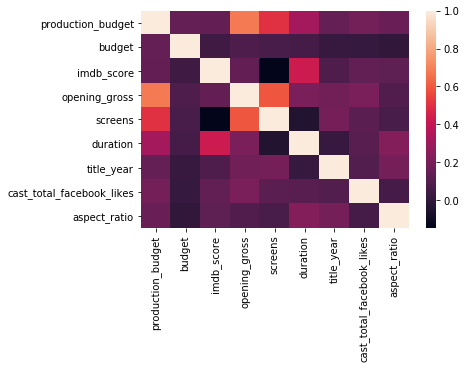

In [3]:
sns.heatmap(df.corr())

## La maldición de la dimensión

---

*Datasaurus Dozen y Anscombe's quartet:* 

Utilidad de la capacidad de entender los datos en 1, 2 y 3 dimensiones del ojo humano.

*Maldición de la dimensionalidad*:

En **dimensión superior o igual a 4**, nuestra capacidad de entender los datos se pierde, **y aún peor fenomenos extraños/contraproducentes ocurren**

---



** Ejemplo 1**

Que largo debe tener cada arista de un hypercubo de dimension p que capture 10% del volumen de un hypercubo de volumen 1 que lo contiene?

<img src="../img/cube.png">

$$ V_{hypercubo} = a^p\ y\ si\ V_{hypercubo} = 0.1 \implies a = 0.1^{1/p}$$
$$$$

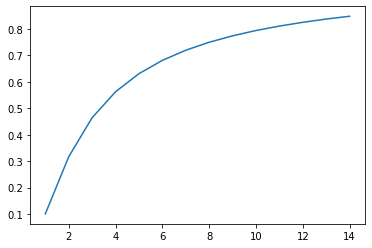

In [4]:
x = np.arange(1,15)
y = np.power(0.1,1/x)
plt.plot(x,y)

**En dimensión 10**: Necesitamos un hypercubo que cubra 80% de cada una de las aristas para solamente obtener 10% del volumen!

<div class="alert alert-success">
  En alta dimensión es muy poco probable que tus ejemplos cubran todo el espacio de forma densa. <br>
  Por ende en **alta dimensión necesitas una cantidad de datos que crece exponencialmente para poder entrenar tus modelos**. <br>
  Te recomendamos tener cuidado al aumentar la dimensión de tus datos, no esta prohibido, pero hacerlo de forma exagerada te puede llevar hacia estos problemas.
</div>